## Multi pulse excitation
In this Session we are explaining some more properties of the source class. 
More precisely: We are showing how one can do multi pulse excitation with 
* Certain pulse frequency until the end of the time scope of the simulation
* Custom defined number of pulses with a set frequency 
    
First we will import the package `NTMpy` and then work with it. 
(Even though the package `numerical units` is not a dependency, we will use it here for reasons of simplicity and to show physical dimensions.)

In [14]:
from NTMpy import NTMpy as ntm
from matplotlib import pyplot as plt
import numpy as np
import numericalunits as u
u.reset_units('SI')

In [15]:
#Define a Source
s                           = ntm.source()
s.spaceprofile              = "TMM"
s.timeprofile               = "repGaussian"
s.FWHM                      = 1*u.ps               #FullWidthHalfMax
s.fluence                   = 5*u.mJ/u.cm**2       #Fluence of the Gaussian
s.t0                        = 1*u.ps               #Peake of Gaussian
s.lambda_vac   = 400                               #Wavelength of incident light (in nm!)
s.theta_in     = np.pi/4                           #Incident angle
s.polarization = "p"
#Considering multiple pulses
s.multipulse                = 'on'
s.frequency                 = 1/(10*u.ps) 

Note, that here the only "new" commands in comparison to the [Getting Started](https://github.com/udcm-su/NTMpy/wiki) are: 
* `s.timeprofile = 'repGaussian'`
* `s.multipulse  = 'on'`
* `s.frequency   = float`

Passing on the source to the simulation class. 

Note that now the input parameters are not relevant but the simulation object is just being created to maintain the workflow of this program. 
We are considering a simulation for the 2 temperature model (electron and lattice system)
where one layer of Platinum is stacked over one layer of Cobalt. Parameters for the electron and lattice system 
are provided in the `sim.addLayer()`- function in a list form for each layer respectively.

In [16]:
#Platinum
length_Pt   = 20*u.nm #Length of the Material
n_Pt        = 1.0433+3.0855j #Complex refractive index
k_el_Pt     = 73*u.W/(u.m*u.K);#Heat conductivity
rho_Pt      = 1e3*21*u.kg/(u.m**3)#Density
C_el_Pt     = lambda Te: (740*u.J/(u.m**3*u.K**2))/(1e3*21*u.kg/(u.m**3)) *Te #Electron heat capacity
C_lat_Pt    = 2.8e6*u.J/(u.m**3*u.K**2)/rho_Pt#Lattice heat capacity
G_Pt        = 1e16*25*u.W/(u.m**3*u.K)        #Lattice electron coupling constant
#Cobalt
length_Co   = 30*u.nm;  
n_Co        = 1.0454+3.2169j
k_el_Co     = 100*u.W/(u.m*u.K);
rho_Co      = 1e3*8.86*u.kg/(u.m**3)
C_el_Co     = lambda Te: (704*u.J/(u.m**3*u.K**2))/(1e3*8.86*u.kg/(u.m**3)) *Te
C_lat_Co    = 4e6*u.J/(u.m**3*u.K**2)/rho_Co
G_Co        = 1e16*93*u.W/(u.m**3*u.K)

In [17]:
sim = ntm.simulation(2,s)
#add parameters for both layers and both systems
sim.addLayer(length_Pt,n_Pt,[k_el_Pt,k_el_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_Pt])  
sim.addLayer(length_Co,n_Co,[k_el_Co,k_el_Co],[C_el_Co,C_lat_Co],rho_Co,G_Co) 
sim.final_time = 100*u.ps                               

In [18]:
#Create a visual object where the simulation gets passed on 
v = ntm.visual(sim)

------------------------------------------------------------
The simulation object of the 2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.12e-15 s
-----------------------------------------------------------
-----------------------------------------------------------
Transfer matrix absorption profile and a repeated Gaussian time profile is taken into account for the source.Length of every layer has to be given in units of meter.
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 47270/47270 [00:13<00:00, 3424.26it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 13.804430961608887
-----------------------------------------------------------


-----------------------------------------------------------
Transfer matrix absorption profile and a repeated Gaussian time profile is taken into account for the source.Length of every layer has to be given in units of meter.
-----------------------------------------------------------


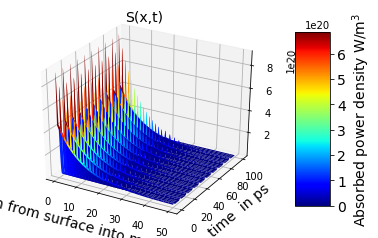

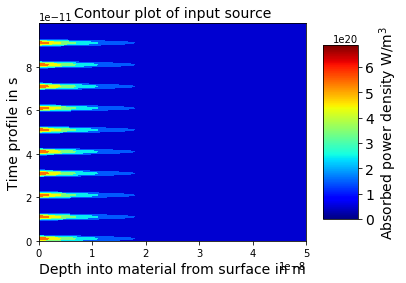

In [19]:
#output of v.source is the full matrix of the source(x,t)
so = v.source()

In a second case we want to demonstrate, that the number of pulses can also be controlled.

In [20]:
#Considering multiple pulses with a selected number of pulses
s.num_of_pulses             = 2                    #Only 2 pulses 

In [21]:
#Since we pass a new source we have to redefie the simulation 
sim = ntm.simulation(2,s) 
sim.addLayer(length_Pt,n_Pt,[k_el_Pt,k_el_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_Pt])  
sim.addLayer(length_Co,n_Co,[k_el_Co,k_el_Co],[C_el_Co,C_lat_Co],rho_Co,G_Co) 
sim.final_time = 100*u.ps  

------------------------------------------------------------
The simulation object of the 2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 2.12e-15 s
-----------------------------------------------------------
-----------------------------------------------------------
Transfer matrix absorption profile and a repeated Gaussian time profile is taken into account for the source.Length of every layer has to be given in units of meter.
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 47270/47270 [00:14<00:00, 3218.98it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 14.700388431549072
-----------------------------------------------------------
-----------------------------------------------------------
Transfer matrix absorption profile and a repeated Gaussian time profile is taken into account for the source.Length of every layer has to be given in units of meter.
-----------------------------------------------------------


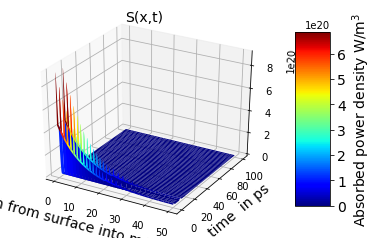

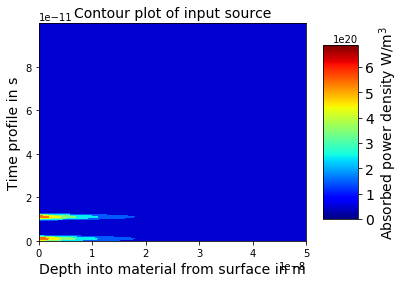

In [22]:
v  = ntm.visual(sim)
so = v.source()

We can now also look at the influence of multiple pulses on the electron and on the lattice system. 
Note that we are considering zero flux Neumann boundary conditions. This means, that there is no heat flux outside of the material under consideration. 

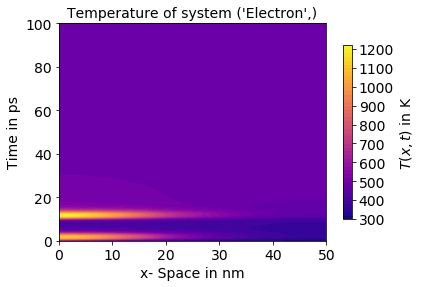

In [23]:
v.contour('Electron')

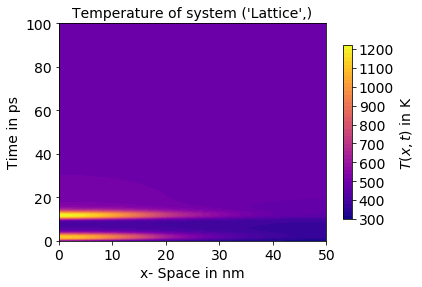

In [24]:
v.contour('Lattice') 

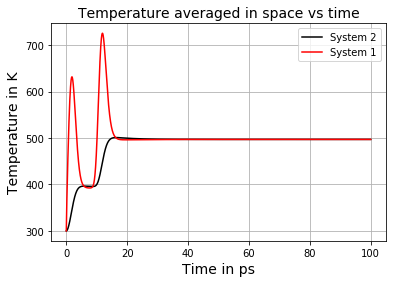

In [25]:
[time,Taverage] = v.average()

To see the local absorption in space of one laser pulse, with respect to the incident powe of the laser.

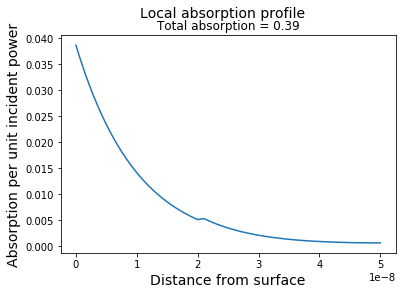

In [26]:
[T,R,A,absorption,xflat,grid] = v.localAbsorption()